<a href="https://colab.research.google.com/github/SSRaylia/Prediction-Using-Machine-Learning/blob/master/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wind Quality Prediction

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [0]:
wine = pd.read_csv("https://raw.githubusercontent.com/SSRaylia/Prediction-Using-Machine-Learning/master/wineQualityReds.csv")
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [0]:
wine.sulphates.describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

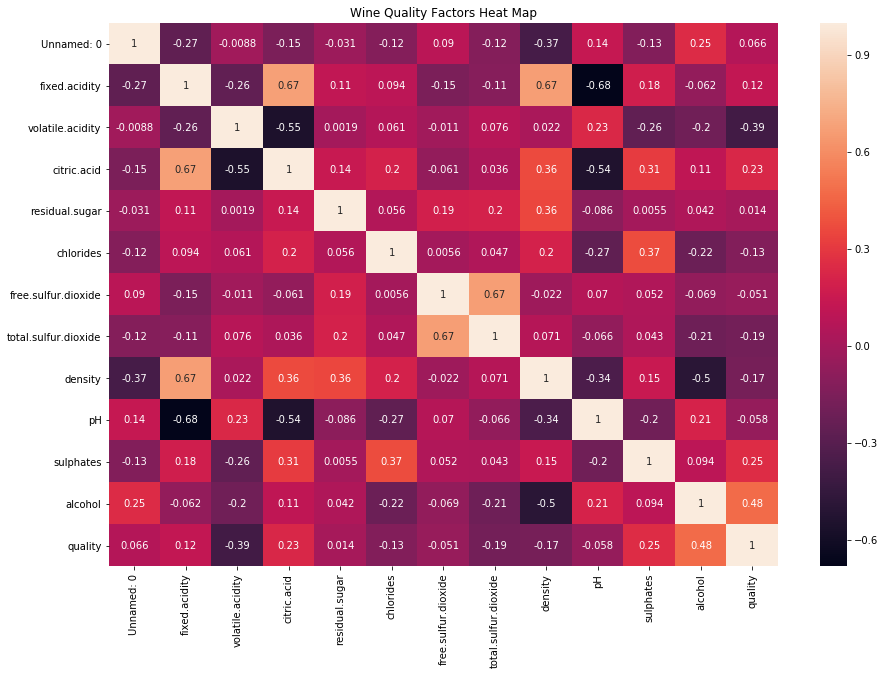

In [0]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Wine Quality Factors Heat Map")
corr = wine.corr()
sns.heatmap(corr,annot = True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Text(0.5, 1.0, 'Alcohol')

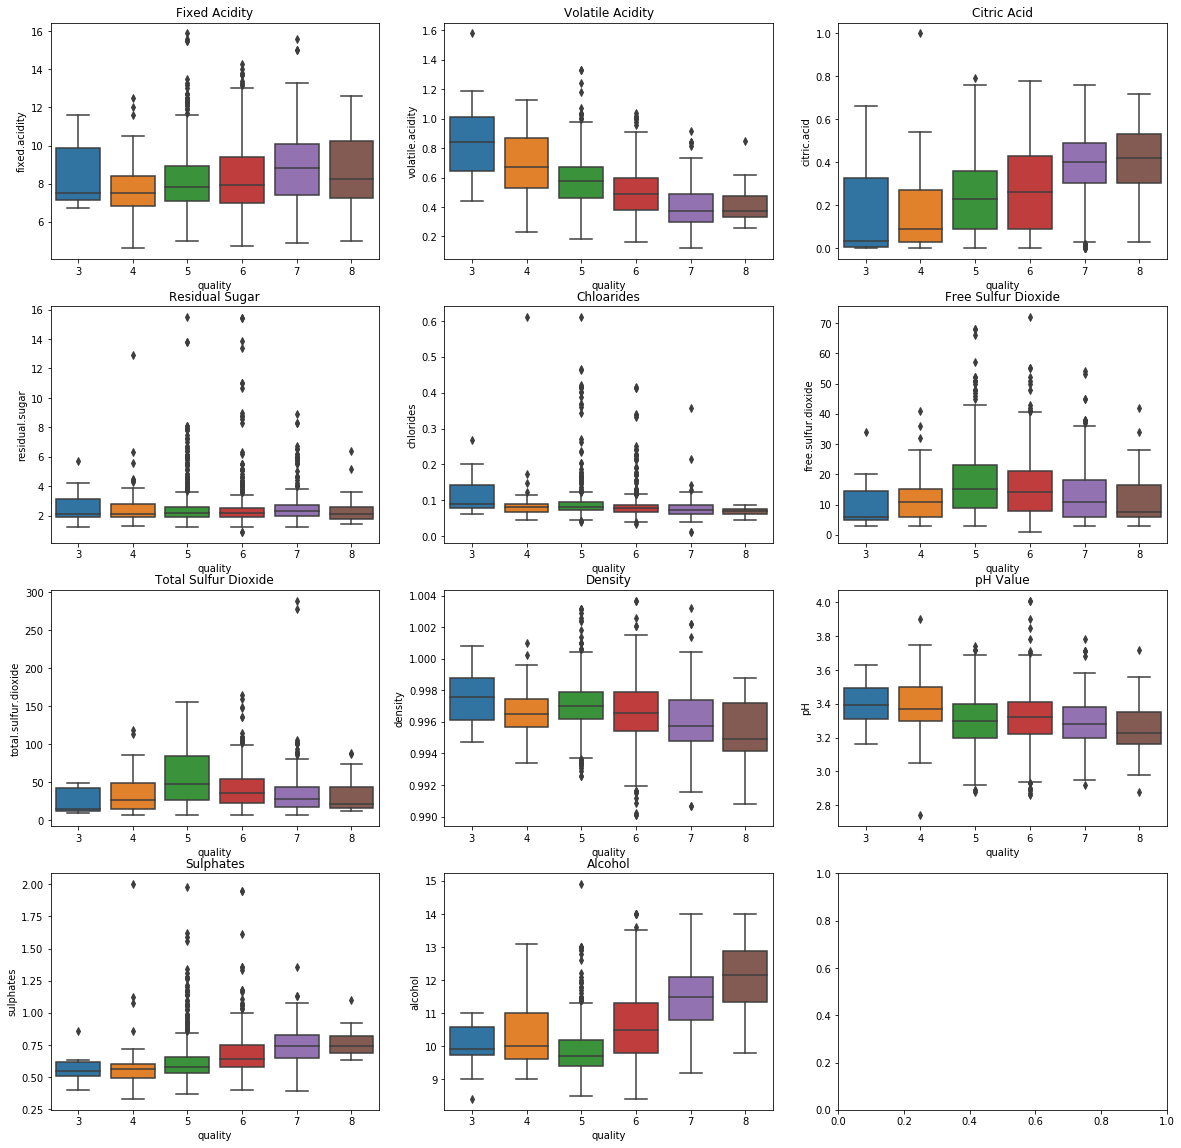

In [0]:
fig, axs = plt.subplots(ncols=3,nrows=4,figsize=(20, 20))
sns.boxplot(x='quality',y='fixed.acidity',data=wine,ax=axs[0,0]).set_title('Fixed Acidity')
sns.boxplot(x='quality',y='volatile.acidity',data=wine,ax=axs[0,1]).set_title('Volatile Acidity')
sns.boxplot(x='quality',y='citric.acid',data=wine,ax=axs[0,2]).set_title('Citric Acid')
sns.boxplot(x='quality',y='residual.sugar',data=wine,ax=axs[1,0]).set_title('Residual Sugar')
sns.boxplot(x='quality',y='chlorides',data=wine,ax=axs[1,1]).set_title('Chloarides')
sns.boxplot(x='quality',y='free.sulfur.dioxide',data=wine,ax=axs[1,2]).set_title('Free Sulfur Dioxide')
sns.boxplot(x='quality',y='total.sulfur.dioxide',data=wine,ax=axs[2,0]).set_title('Total Sulfur Dioxide')
sns.boxplot(x='quality',y='density',data=wine,ax=axs[2,1]).set_title('Density')
sns.boxplot(x='quality',y='pH',data=wine,ax=axs[2,2]).set_title('pH Value')
sns.boxplot(x='quality',y='sulphates',data=wine,ax=axs[3,0]).set_title('Sulphates')
sns.boxplot(x='quality',y='alcohol',data=wine,ax=axs[3,1]).set_title('Alcohol')

# Data Preparation

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [0]:
for df in [wine]:
    df['quality']=df['quality'].map({3:1, 4:1, 5:2, 6:2, 7:3,8:3})

In [0]:
# Split the dependant and independant variables
X = wine.iloc[:, :-1].values
y = wine.iloc[:, -1].values
# Splitting the data into Training set & Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)
predict1 = log.predict(X_test)
AS1=accuracy_score(y_test,predict1)
print('Accuracy Score: ',AS1)

Accuracy Score:  0.86875


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


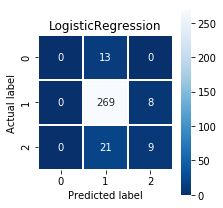

In [0]:
cm = metrics.confusion_matrix(y_test, predict1)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('LogisticRegression', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
predict2 = rfc.predict(X_test)
AS2=accuracy_score(y_test,predict2)
print('Accuracy Score: ',AS2)

Accuracy Score:  0.865625


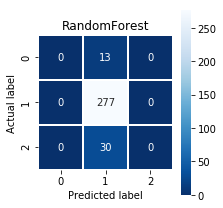

In [0]:
#Check Model Performance
cm = metrics.confusion_matrix(y_test, predict2)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('RandomForest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
#AutoML
!apt-get install default-jre
!java -version

!pip install -q h2o

import h2o
from h2o.automl import H2OAutoML

h2o.init()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
openjdk version "11.0.2" 2019-01-15
OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3)
OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
     |████████████████████████████████| 121.8MB 145kB/s 
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Star

H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_unknownUser_nj13oh
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
#Building Model
df = h2o.H2OFrame(wine)
train, valid, test = df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "quality"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows in train, valid and test set :  967 321 311


In [0]:
predictors = df.columns[:-1]
aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
lb = aml.leaderboard
lb

model_id,mean_per_class_error,logloss,rmse,mse
GBM_1_AutoML_20190509_223539,0.527839,0.423075,0.346909,0.120346
GBM_4_AutoML_20190509_223539,0.528706,0.404071,0.343942,0.118296
GBM_3_AutoML_20190509_223539,0.535983,0.408452,0.346104,0.119788
GBM_2_AutoML_20190509_223539,0.54409,0.412675,0.348413,0.121392
StackedEnsemble_AllModels_AutoML_20190509_223539,0.548766,0.418152,0.347383,0.120675
DRF_1_AutoML_20190509_223539,0.55586,1.37525,0.349024,0.121818
XGBoost_1_AutoML_20190509_223539,0.556533,0.402709,0.346852,0.120306
StackedEnsemble_BestOfFamily_AutoML_20190509_223539,0.567618,0.426959,0.350376,0.122764
XGBoost_3_AutoML_20190509_223539,0.569805,0.504036,0.397391,0.157919
XGBoost_2_AutoML_20190509_223539,0.585225,0.503984,0.39789,0.158316


In [0]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['quality'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['quality'].values, dtrain_predictions))

In [0]:
predictors = [x for x in wine.columns if x not in ['quality']]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, wine, predictors)


Model Report
Accuracy : 0.9487


In [0]:
mmss = [['LogisticRegression', AS1], ['RandomForest',AS2],['AutoML - GBM',0.9487]]   
ms = pd.DataFrame(mmss, columns = ['Model','Accuracy Score'])  
ms

,Model,Accuracy Score
0,LogisticRegression,0.868750
1,RandomForest,0.865625
2,AutoML - GBM,0.948700
